# Information about previous top 100 winners

### Sectors: ICT, Life Sciences, Cleantech, Hightech, Products and Services
### Filters: Technology, Location, Founding Year, Support, University

# Import modules

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tools for cleaning data

In [90]:
def get_clean_data(year) :
    """
    Retrieve the data corresponding to the 100 winners of a given year from an Excel file and do some cleaning of the data.
    """
    filename = '../data/WinnerStartups'+str(year)+'.xlsx'

    df = pd.read_excel(filename)
    #print(df.head())

    dfPart1 = df.loc[np.arange(0,df.shape[0],2),]
    #print(dfPart1.head())
    #print(dfPart1.shape)

    dfPart2 = df.loc[np.arange(1,df.shape[0],2),]
    #print(dfPart2['Startup'].head())

    dfPart2['City'],dfPart2['Year']=dfPart2['Startup'].str.split(', ',1).str
    #print(dfPart2[['City','Year']].head())

    dfPart1Temp = dfPart1.reset_index()
    #print(dfPart1Temp.head())

    dfPart2Temp = dfPart2.reset_index()
    #print(dfPart2Temp.head())

    dfClean = pd.DataFrame()
    for col in ['Rank','Startup','Description'] :
        dfClean[col] = dfPart1Temp[col]
    for col in ['City','Year'] :
        dfClean[col] = dfPart2Temp[col]

    return dfClean

# Market analysis 

In [91]:
macro_sectors = ['ICT','Life Sciences','Cleantech','Hightech','Products and Services']
sectorsDict = {
    'ICT':[
        'Advertising',
        'Applications',
        'AR/VR/MR',
        'Big Data',
        'Blockchain',
        'Cloud',
        'Consumer',
        'Digital Health',
        'Ecommerce',
        'Enterprise',
        'Gaming',
        'Internet',
        'IoT',
        'Machine Learning/AI',
        'Marketplace',
        'Media',
        'Mobile',
        'Open source',
        'SaaS',
        'Security',
        'Social networks',
        'Software',
        'Wearable technologies'
    ],
    'Life Sciences':[
        'Antibodies',
        'Bioinformatics',
        'Biomaterials',
        'Biotech',
        'Cancer',
        'Cardiovascular',
        'Diagnostics',
        'Drug development platforms',
        'Drug discovery',
        'Healthcare infrastructure',
        'Infection',
        'Imaging and Radiology',
        'Inflammation',
        'Medical devices',
        'Medtech',
        'Neurology',
        'Organ and Tissues',
        'Patient monitoring',
        'Protein drugs',
        'Rehab',
        'Screening',
        'Small molecule drugs',
        'Surgery',
        'Urology',
        'Vaccines',
        'Wound management',
        ],
    'Cleantech':[
        'Air and Environment',
        'Cleantech',
        'Energy efficiency',
        'Energy production',
        'Energy storage',
        'Mobility',
        'Renewable energy',
        'Smart Home',
        'Smart Power, Green Grid',
        'Solar',
        'Water and wastewater',
    ],
    'Hightech':[
        'AgriTech',
        'Automotive',
        'Aviation and Aerospace',
        'Chemicals',
        'Drones',
        'Electronics',
        'Materials',
        'Hightech',
        'Instruments',
        'Mechanics',
        'Micro technologies',
        'Nano technologies',
        'Optics',
        'Robotics',
        'Sensors',
        'Semiconductors',
        'Wireless',
        'Interdisciplinary',
    ],
    'Products and Services':[
        'Consumer products',
        'Communications',
        'Consulting services',
        'Education',
        'Finance',
        'Fintech',
        'Food',
        'Hardware',
        'Marketing services',
        'OEM, Production',
        'Real estate and construction',
        'Research and development',
        'Services for companies',
        'Services for consumers',
        'Sport',
    ],
}

In [92]:
# From wayback machine, going back to the historical version of the website.
data = pd.DataFrame(columns=['Year']+macro_sectors)
data['Year']=[2017,2016,2015,2014,2013,2012,2011]
data['ICT']=[196,150,120,90,78,30,0]
data['Life Sciences']=[135,107,85,68,64,30,0]
data['Cleantech']=[31,34,27,26,35,9,0]
data['Hightech']=[126,64,89,68,81,24,0]
data['Products and Services']=[61,57,44,33,27,4,0]
data.head(7)

,Year,ICT,Life Sciences,Cleantech,Hightech,Products and Services
0,2017,196,135,31,126,61
1,2016,150,107,34,64,57
2,2015,120,85,27,89,44
3,2014,90,68,26,68,33
4,2013,78,64,35,81,27
5,2012,30,30,9,24,4
6,2011,0,0,0,0,0


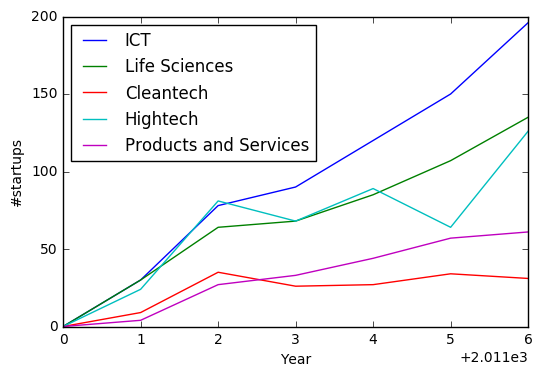

In [93]:
plt.figure(1)
plt.plot(data['Year'],data['ICT'])
plt.plot(data['Year'],data['Life Sciences'])
plt.plot(data['Year'],data['Cleantech'])
plt.plot(data['Year'],data['Hightech'])
plt.plot(data['Year'],data['Products and Services'])
plt.xlabel('Year')
plt.ylabel('#startups')
plt.legend(loc='best')
plt.show()
plt.savefig('../results/Trends.pdf',format='pdf')

# Data processing

In [94]:
years = [2017,2016,2015,2014,2013,2012,2011]

dfDict = {}

for year in years :
    dfDict[year] = get_clean_data(year)
    print(dfDict[year].head())

   Rank        Startup                                        Description  \
0   1.0         Ava AG  Ava crafts a natural and reliable technology t...   
1   2.0    L.E.S.S. SA  L.E.S.S. SA (“Light Efficient SystemS”) has pr...   
2   3.0  Flyability SA  Flyability is developing Gimball, a game-chang...   
3   4.0       bexio AG  bexio develops and sells an accounting softwar...   
4   5.0    MindMaze SA  MindMaze combines immersive virtual reality, b...   

         City  Year  
0      Zürich  2014  
1    Ecublens  2012  
2    Lausanne  2014  
3  Rapperswil  2013  
4    Ecublens  2012  
   Rank                                        Startup  \
0   1.0                                    L.E.S.S. SA   
1   2.0                                       Bcomp AG   
2   3.0  Knip AG (acquired by Digital Insurance Group)   
3   4.0                                  Flyability SA   
4   5.0                             Sophia Genetics SA   

                                         Description    

In [95]:
# Prepare a dictionary with keys corresponding to years and values corresponding to list of top 100 winners of that year. 
# Useful to loop over startups.
winnersDict = {}
for year in years:
    winnersDict[year] = dfDict[year]['Startup'].values
    # print(winnersDict[year])

In [96]:
# For each year, add a column to the corresponding dataframe with the number of times the startup was in the top 100 winners.
def count(startup,year) :
    counter = 0
    for i_year in years :
        if (i_year<year) :
            if (startup in winnersDict[i_year]) :
                counter += 1
    return counter

In [97]:
# Example of how to apply a function to each row.
df = pd.DataFrame()
df['A'] = [1,2,3]
df['B'] = [4,5,6]
df['C'] = df['A'].apply(np.sqrt)
print(df.head())

   A  B         C
0  1  4  1.000000
1  2  5  1.414214
2  3  6  1.732051


In [98]:
# For each startup, search for the startup name in the database of the previous years and increment a counter.
for year in years :
    dfDict[year]['Previous wins'] = dfDict[year]['Startup'].apply(count,year=year)
    print('Year:', year)
    print('Min #wins:', dfDict[year]['Previous wins'].min())
    print('Max #wins:', dfDict[year]['Previous wins'].max())
    idmax = dfDict[year]['Previous wins'].idxmax()
    print('Company corresponding to max #wins:', idmax)
    startup_max = dfDict[year]['Startup'][idmax]
    print('Company corresponding to max #wins:',startup_max)

Year: 2017
Min #wins: 0
Max #wins: 5
Company corresponding to max #wins: 1
Company corresponding to max #wins: L.E.S.S. SA
Year: 2016
Min #wins: 0
Max #wins: 4
Company corresponding to max #wins: 0
Company corresponding to max #wins: L.E.S.S. SA
Year: 2015
Min #wins: 0
Max #wins: 4
Company corresponding to max #wins: 1
Company corresponding to max #wins: Abionic SA
Year: 2014
Min #wins: 0
Max #wins: 3
Company corresponding to max #wins: 0
Company corresponding to max #wins: InSphero AG
Year: 2013
Min #wins: 0
Max #wins: 2
Company corresponding to max #wins: 0
Company corresponding to max #wins: HouseTrip SA (acquired by TripAdvisor)
Year: 2012
Min #wins: 0
Max #wins: 1
Company corresponding to max #wins: 0
Company corresponding to max #wins: HouseTrip SA (acquired by TripAdvisor)
Year: 2011
Min #wins: 0
Max #wins: 0
Company corresponding to max #wins: 0
Company corresponding to max #wins: Optotune AG


In [99]:
# Check the 2012 startup that won the highest number of times in the past.
dfDict[2012].query("Startup=='HouseTrip SA (acquired by TripAdvisor)'")

,Rank,Startup,Description,City,Year,Previous wins
0,1.0,HouseTrip SA (acquired by TripAdvisor),HouseTrip is one of Europe’s largest holiday r...,London W1T 7RJ,2009,1


In [100]:
# Example for 2011 dataset. In this case, there are no previous years available, so it makes sense that the cunter is zero for all startups.
dfDict[2011]['Previous wins'] = dfDict[2011]['Startup'].apply(count,year=2011)
print(dfDict[2011]['Previous wins'].head())
print(dfDict[2011]['Previous wins'].min())
print(dfDict[2011]['Previous wins'].max())

0    0
1    0
2    0
3    0
4    0
Name: Previous wins, dtype: int64
0
0


# Keywords and information retrieval

In [101]:
# Add information on sector and keywords for each startup in the historical database.
# How?

# Field we might want to add: 
# "Uni spin-off", 
# "Technology", 
# "Incorporation Date",
# "Number of Employees".

# 2018 data

In [102]:
df2018 = pd.read_excel("../data/startup.ch 2013 - 2018.xlsx")

In [103]:
df2018.head()

,Salutation,Firstname,Lastname,Company,City,Uni spin-off,Technology,Incorporation Date,Number of Employees,1Liner,Description
0,Cher Monsieur,Osiris,Marroquin,ImmunOs Therapeutics GmbH,Basel,Swiss Federal Institute of Technology Lausanne...,Biotech,2014-12-09,NaN,Drug development using a novel method to antag...,ImmunOs Therapeutics AG is leading the next ge...
1,Dear Dr.,Srinivasan,Murali,SmartCardia SA,Lausanne,Swiss Federal Institute of Technology Lausanne...,"Micro-, Nano Technology",2013-10-29,NaN,Cloud based cardiac solution,We have developed an ultra-small portable card...
2,Dear,Mark-Eric,Jones,Leman Micro Devices SA,Lausanne,Andere - Autres - Others,"Micro-, Nano Technology",2013-01-29,NaN,Bringing the latest digital technology to the ...,A personal health monitor in your smartphone: ...
3,Sehr geehrter Herr,Bertrand,Baeriswyl,FairTrace SA,Sierre,Andere - Autres - Others,Software,2013-10-01,2.0,"Allowing the user to know the origin, the cycl...",The Company\r\n\r\nFairTrace is a Swiss compan...
4,Dear Mr.,Rajwinder,Lehal,Cellestia Biotech AG,Basel,Swiss Federal Institute of Technology Lausanne...,Biotech,2014-05-20,7.0,Targeted anti-cancer therapy,Cellestia focuses on small molecules capable o...


In [107]:
print('Available information:',df2018.columns)

Available information: Index(['Salutation', 'Firstname', 'Lastname', 'Company', 'City',
       'Uni spin-off', 'Technology', 'Incorporation Date',
       'Number of Employees', '1Liner', 'Description'],
      dtype='object')


In [108]:
print('Number of columns:',df2018.shape[0])
print('Number of columns:',df2018.shape[1])

Number of columns: 667
Number of columns: 11


In [109]:
features = df2018.columns
print(features)

Index(['Salutation', 'Firstname', 'Lastname', 'Company', 'City',
       'Uni spin-off', 'Technology', 'Incorporation Date',
       'Number of Employees', '1Liner', 'Description'],
      dtype='object')


In [111]:
df2018['Year'] = df2018['Incorporation Date'].dt.year
print(df2018.head())

           Salutation   Firstname   Lastname                    Company  \
0       Cher Monsieur      Osiris  Marroquin  ImmunOs Therapeutics GmbH   
1            Dear Dr.  Srinivasan     Murali             SmartCardia SA   
2                Dear   Mark-Eric      Jones     Leman Micro Devices SA   
3  Sehr geehrter Herr    Bertrand  Baeriswyl               FairTrace SA   
4            Dear Mr.   Rajwinder      Lehal       Cellestia Biotech AG   

       City                                       Uni spin-off  \
0     Basel  Swiss Federal Institute of Technology Lausanne...   
1  Lausanne  Swiss Federal Institute of Technology Lausanne...   
2  Lausanne                           Andere - Autres - Others   
3    Sierre                           Andere - Autres - Others   
4     Basel  Swiss Federal Institute of Technology Lausanne...   

                Technology Incorporation Date  Number of Employees  \
0                  Biotech         2014-12-09                  NaN   
1  Micro-, N

# Machine learning

Information on one-class classification:
http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [ ]:
X_train = 
X_test = 
X_outliers = 

In [ ]:
clf = svm.OneClassSVM(nu=0.1,kernel="rbf",gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size